In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("data.csv", delimiter=",")

print(data.shape) # on.y one feature, and one output

(100, 2)


In [15]:
x = data[:, 0] # for self written predict

# x = data[:, 0].reshape(-1, 1) # for sklearn fitting
y = data[:, 1]

In [16]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# y = mx + c

print(model.coef_) # m
print(model.intercept_) # c

[1.33665233]
6.416773605912027


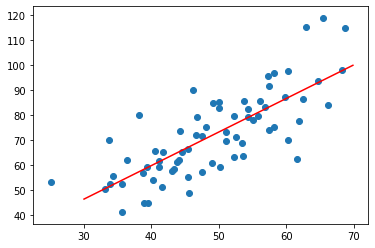

In [12]:
# plotting test data graph

m = model.coef_
c = model.intercept_

x_line = np.arange(30, 70, 0.1)
y_line = m * x_line + c

plt.plot(x_line, y_line, "r")
train_1d = x_train.reshape(70)
plt.scatter(x_train, y_train)
plt.show()

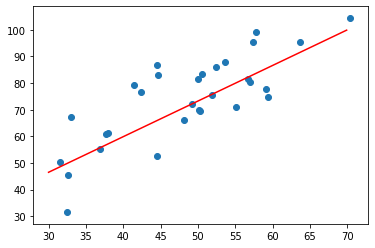

In [13]:
# plotting test data graph

m = model.coef_
c = model.intercept_

x_line = np.arange(30, 70, 0.1)
y_line = m * x_line + c

plt.plot(x_line, y_line, "r")
train_1d = x_test.reshape(30)
plt.scatter(x_test, y_test)
plt.show()

In [14]:
score_test = model.score(x_test, y_test)
score_train = model.score(x_train, y_train)

print(score_test)
print(score_train)

0.598174439197328
0.5932984495798209


In [17]:
def fit(x_train, y_train):

    num = (x_train * y_train).mean() - (x_train.mean() * y_train.mean())
    den = (x_train**2).mean() - (x_train.mean()**2)
    m = num/den
    
    c = y_train.mean() - m * x_train.mean()

    return m, c

In [18]:
m, c = fit(x_train, y_train)

def predict(x, m, c):
    return m * x + c

def score(y_train, y_pred):
    score = 1 - ((((y_train - y_pred)**2).sum())/((y_train - y_train.mean())**2).sum())
    return score

def cost(x, y, m, c):
    return ((y - m*x - c)**2).mean()

In [19]:
y_test_pred = predict(x_test, m, c)
print("Test Score: ", score(y_test, y_test_pred))

y_train_pred = predict(x_train, m, c)
print("Train Score: ", score(y_train, y_train_pred))

print("M C: ", m, c)
print("Cost on training data: ", cost(x_train, y_train, m ,c))

Test Score:  0.49554792360192657
Train Score:  0.618200990438502
M C:  1.329441781055236 7.901746202425969
Cost on training data:  110.7188730991586
